# <span style="color:blue">Axis Insurance Project</span>
*by: Garey Salinas*

## <span style="color:blue">Instructions</span>

**Objective**<br>
Statistical Analysis of Business Data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

**You are expected to do the following:**
* Explore the dataset and extract insights using Exploratory Data Analysis.
* Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? [Hint- Formulate a hypothesis and prove/disprove it]
* Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
* Is the proportion of smokers significantly different across different regions? [Hint : Create a contingency table/cross tab, Use the function : stats.chi2_contingency()]
* Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

**Consider a significance level of 0.05 for all tests.**

**Context**<br>
Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

**Data Dictionary**

LABELS |DESCRIPTION
:------|:------------
Age |This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
Sex |This is the policy holder's gender, either male or female.
BMI |This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
Children |This is an integer indicating the number of children / dependents covered by the insurance plan.
Smoker |This is yes or no depending on whether the insured regularly smokes tobacco.
Region |This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
Charges |Individual medical costs billed to health insurance

## <span style="color:blue">Import Libraries</span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols     # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from scipy.stats import chi2_contingency   # For Chi-Sq 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
# ignore warnings
warnings.filterwarnings("ignore")

sns.set_style("dark")
sns.set(color_codes=True)

## <span style="color:blue">Read dataset</span>

In [2]:
data = pd.read_csv('AxisInsurance.csv')
df = data.copy()

## <span style="color:blue">Check head and tail of dataset</span>

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## <span style="color:blue">Shape of dataset</span>

In [5]:
df.shape

(1338, 7)

**Observations**
- The head and tail of dataset look show similar types of data
- There are 1338 observations and 7 features

In [6]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 286.5 KB


**Observations**
- The age, bmi and charges is numerical data
- The sex, smoker, and region is categorical data
- Children could be used as a categorical variable.
- Total memory usage is 286.5 KB before change dtypes.

**Note**
- Change the dtype of (sex, smoker, region) from object to category.
- Will check number of unique values of children and could use as a categorical without changing the dtype.

## <span style="color:blue">Describe the dataset</span>

In [7]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Observations**
- **Age**
    - Doesnt have any missing values with 1338 observations.
    - Has a mean of about 39 with a standard deviation of 14. 
    - The range is from ages 14 to 64. 
    - Most of the data lies in the top quantile
- **Sex**
    - Doesnt have any missing values with 1338 observations.
    - Has only two possible values (Male/Female).
    - Male has the highest frequency with 676 observations.
- **BMI**
    - Doesnt have any missing values with 1338 observations.
    - Has a mean of about 30 with a standard deviation of about 6.
    - The range spans from 16 to 53.
    - Most of the observations lie in the upper quantile. 
    - Looks to be more uniformly distributed than age.
- **Children**
    - Doesn't have any missing values with 1338 observations.
    - Number of children range from 0 to 5.
    - The average number of children is about 1 with about standard deviation.
- **Smoker**
    - Doesnt have any missing values with 1338 observations
    - Only has two values (yes/no).
    - Most of the values is a "no" with a frequency 1064, which mean "yes" has a frequency of 1338-1064.
- **Region**
    - Doesnt have any missing values with 1338 observations.
    - Has only 4 unique values. Holds categorical variables.
    - Southeast has the highest frequency with 364 observations.
- **Charges**
    - Doesnt have any missing values with 1338 observations.
    - Has a mean of 13730 and a standard deviation of 12110.
    - Observation values range from 1122 to 63770.
    - Most of the observations lie in the top quantile.

**Note**
- Two observations have the same BMI. Need to check for duplicated values.


In [9]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [11]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [12]:
df.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [13]:
# Before changing (sex/smoker/region) dtype to category
# lets check how much memory we will save.
print(f"sex, smoker, region number of bytes: {df.sex.nbytes, df.smoker.nbytes, df.region.nbytes}")

sex, smoker, region number of bytes: (10704, 10704, 10704)


## <span style="color:blue">Change category dtypes</span>

In [14]:
# change dtype to categorical
df['sex'] = df.sex.astype('category')
df['smoker'] = df.smoker.astype('category')
df['region'] = df.region.astype('category')

In [15]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [16]:
# After changing (sex/smoker/region) dtype to category
# lets check how much memory we will save.
print(f"sex, smoker, region number of bytes: {df.sex.nbytes, df.smoker.nbytes, df.region.nbytes}")

sex, smoker, region number of bytes: (1354, 1354, 1370)


In [17]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.7 KB


**Observations**
- sex, smoker, and region dtypes have been coverted to categories
- Total memory usage after changing dtypes is 46.7 KB

In [18]:
numerical_features = df.select_dtypes(include=['int64','float64'])
numerical_features

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


## <span style="color:blue">Check skewness of features</span>

In [19]:
skewed_features = numerical_features.skew()
skewed_features

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [20]:
skewness = skewed_features[abs(skewed_features)>0.7]
print (f"There are {skewness.shape[0]} highly skewed numerical features.")
skewness

There are 2 highly skewed numerical features.


children    0.93838
charges     1.51588
dtype: float64

**Observations**
- There are two highly skewed features in the dataset (children and charges).

## <span style="color:blue">EDA</span>

In [21]:
def histogram_boxplot(feature, figsize=(10,5), bins=None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15,10))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='yellow') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='-')# Add median to the histogram
    ax_hist2.axvline(feature.mode()[0], color='red', linestyle='--') # Add mode to histogram with red dashed line

### <span style="color:blue">Observations on Age</span>

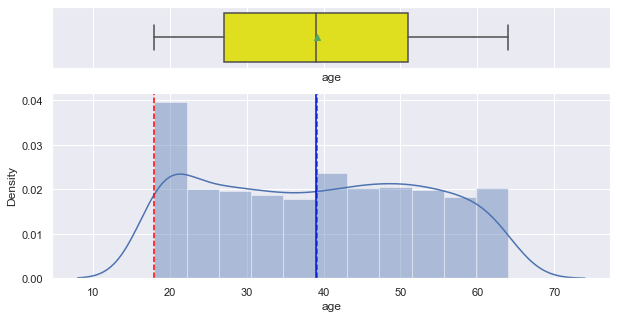

In [22]:
histogram_boxplot(df.age);

**Observations**
- Age distribution is uniform with a mean age of about 39.
- Most of the observations in the dataset have an age of about 20.

### <span style="color:blue">Observations on BMI</span>

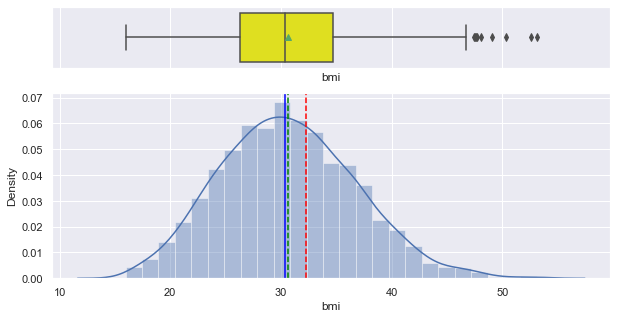

In [23]:
histogram_boxplot(df.bmi);

**Observations**
- Bmi appears to be normal with a slight right skew.
- The mean value of bmi is about 30.
- There are a few outliers.

### <span style="color:blue">Observations on Children</span>

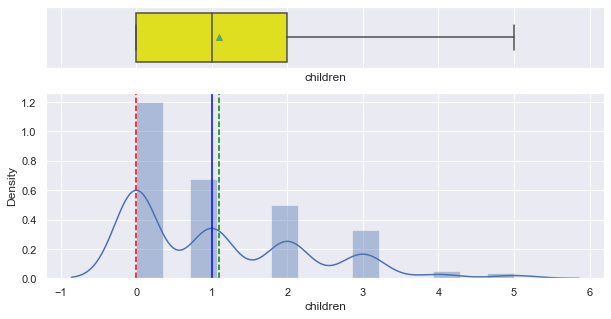

In [24]:
histogram_boxplot(df.children);

**Observations**
- Children is highly skewed and is right skewed with a mean of 1.
- most of the observations appear to be in Q3.
- children has a mode value of 0.

### <span style="color:blue">Observations on charges</span>

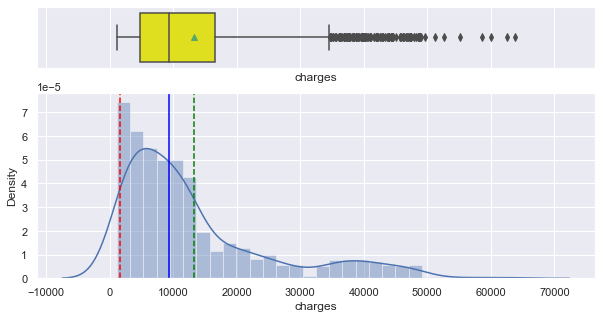

In [25]:
histogram_boxplot(df.charges);

**Observations**
- Charges has the highest skew and is a right skew.
- The mean value of charges is about 10,000.
- There are many outliers outside the Q3 quantile.

In [26]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### <span style="color:blue">Observations on Sex</span>

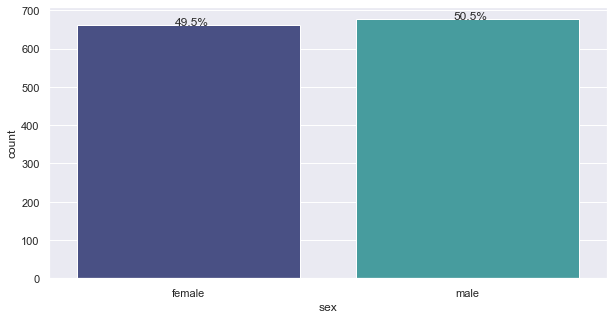

In [27]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df.sex, palette='mako')
perc_on_bar(ax, df.sex)

**Observations**
- Male has the most observations making up 50.5% of the dataset.
- Females make up 49.5% of the dataset.

### <span style="color:blue">Observations on Children</span>

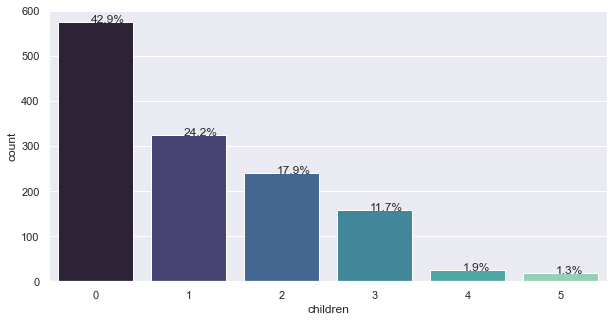

In [28]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df.children, palette='mako')
perc_on_bar(ax, df.children)

**Observations**
- Most of the dataset has 0 children with 42.9% of the dataset.
- 1 child makes up 24.2% of the dataset
- 2 children makes up 17.9%, and 3 children make up 11.7% of the dataset.
- 4 and 5 children make up 2% and 1% of the dataset.
- As the number of children increase the percentage of children that make up the dataset decreases.

### <span style="color:blue">Observations on Smoker</span>

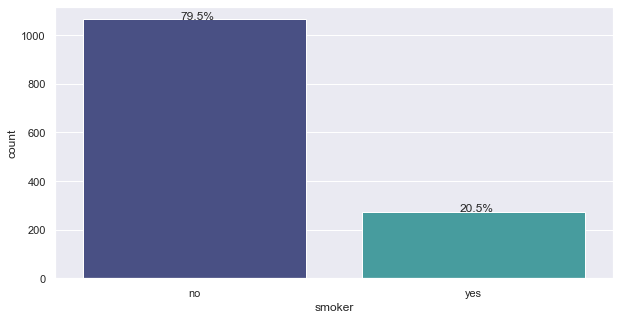

In [29]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df.smoker, palette='mako')
perc_on_bar(ax, df.smoker)

**Observations**
- Non-smokers make up most the dataset with 79.5%.
- Smoker make up 20.5% of the dataset.

### <span style="color:blue">Observations on Region</span>

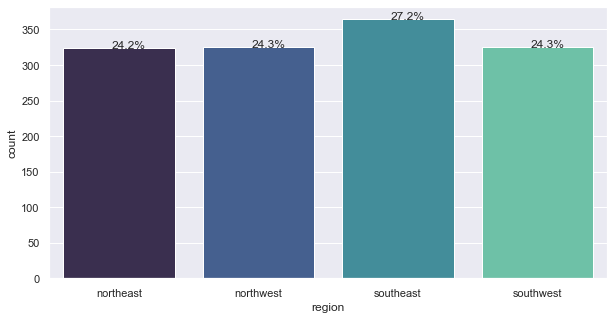

In [30]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df.region, palette="mako")
perc_on_bar(ax, df.region)

**Observations**
- The percentages across regions high slight differences.
- Southeast region make up most of the dataset with 27.2%.
- Northeast make up 24.2% of the dataset.
- Northwest and southwest make up 24.3% of the dataset.

### <span style="color:blue">Bivariate Analysis</span>

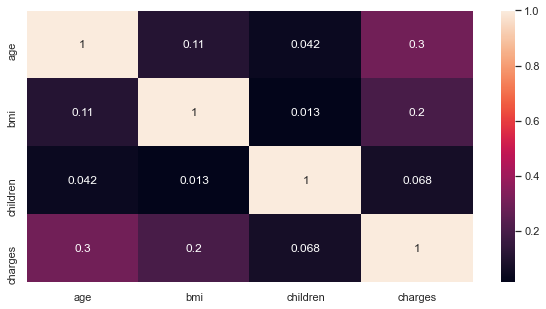

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True);

**Observations**
- The numerical variables in the dataset aren't highly correlated.
- The strongest correlations exist among age and charges, meaning the higher the age the more medical charges.
- The second highest correlations exist amongst bmi and charges, meaning the higher the bmi the more medical charges.

<Figure size 720x360 with 0 Axes>

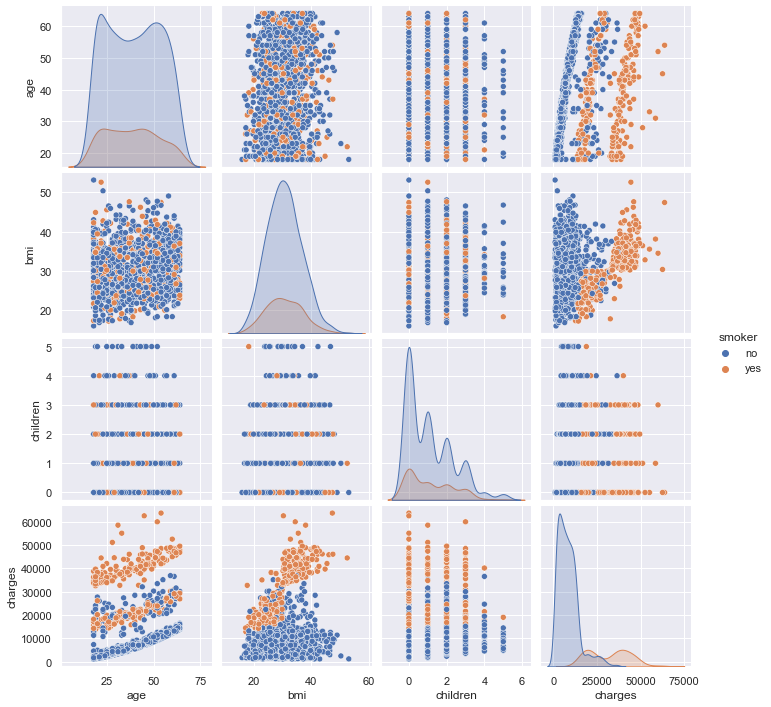

In [32]:
plt.figure(figsize=(10,5))
sns.pairplot(data=df, hue="smoker");

**Observation**
- We can see varying distributions among medical charges of smokers versus non-smokers in the dataset.

### <span style="color:blue">Smokers vs Age</span>

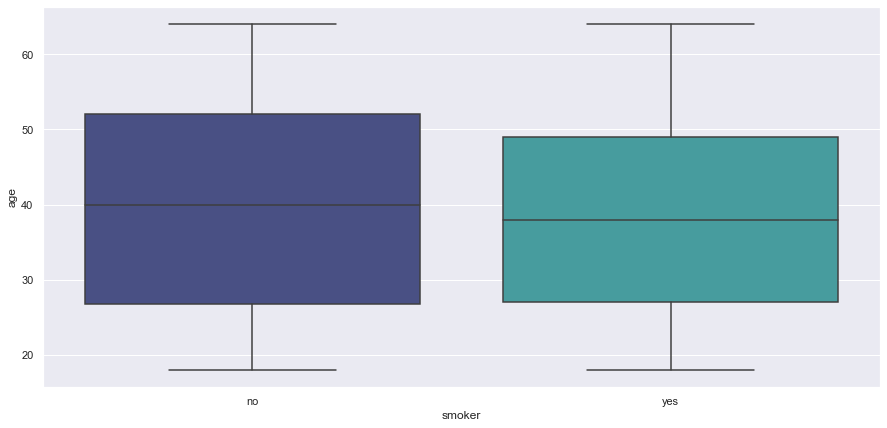

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(df.smoker, df.age, palette="mako");

**Observations**
- The non-smokers versus those who smoke have similar dispersions in the dataset.
- The mean age of smokers versus those who don't smoke is about 40 years of age.

### <span style="color:blue">Smokers vs BMI</span>

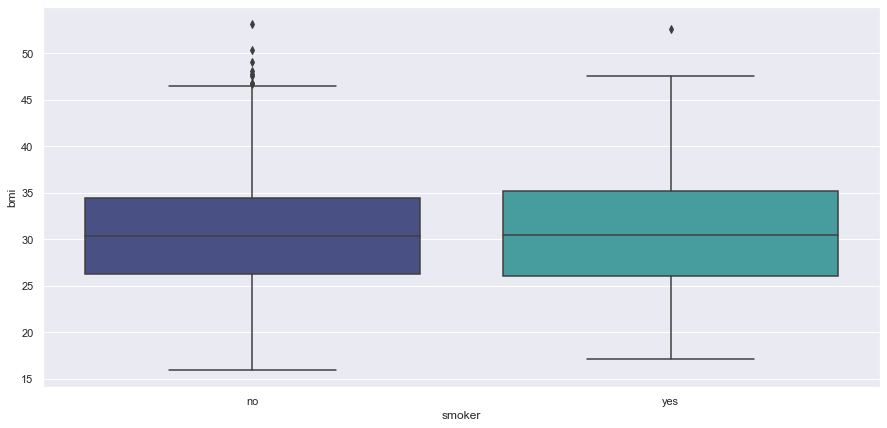

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot(df.smoker, df.bmi, palette="mako");

**Observations**
- The dispersion among smokers and non-smokers versus bmi are similar with a mean of about 32 bmi.
- There are more outliers in the bmi of non-smokers.

### <span style="color:blue">Smoker vs Charges</span>

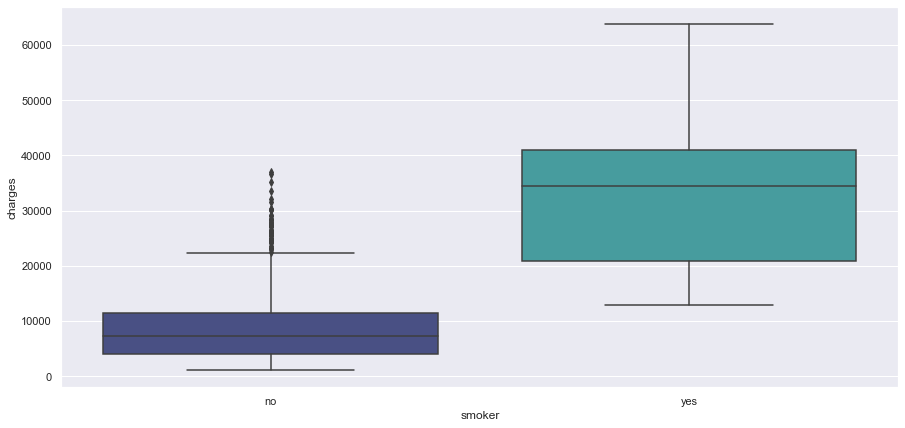

In [35]:
plt.figure(figsize=(15,7))
sns.boxplot(df.smoker, df.charges, palette="mako");

**Observations**
- Smokers have more medical charges with a mean of about 35,000 dollars of charges.
- Non-smokers have a mean of about 8,000 dollars worth of medical charges.

### <span style="color:blue">Smokers vs Children</span>

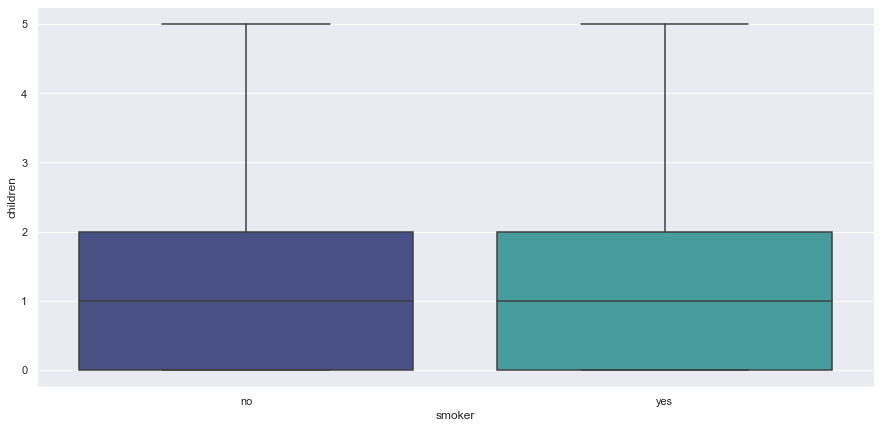

In [36]:
plt.figure(figsize=(15,7))
sns.boxplot(df.smoker, df.children, palette="mako");

**Observations**
- Non-smokers and smokers with children have a similar dispersion with a mean of 1 child.

### <span style="color:blue">Smokers vs Sex</span>

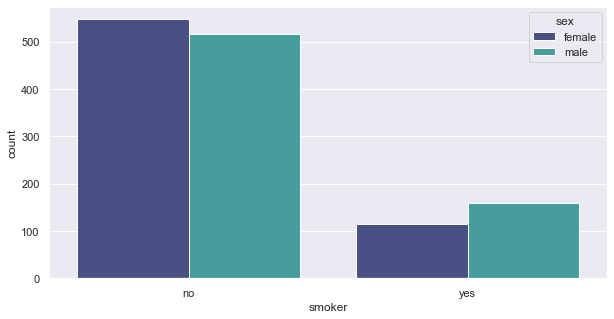

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(df.smoker, hue=df.sex, palette="mako");

**Observations**
- We can see that more men smoke than women in the dataset.

### <span style="color:blue">Smokers vs Region</span>

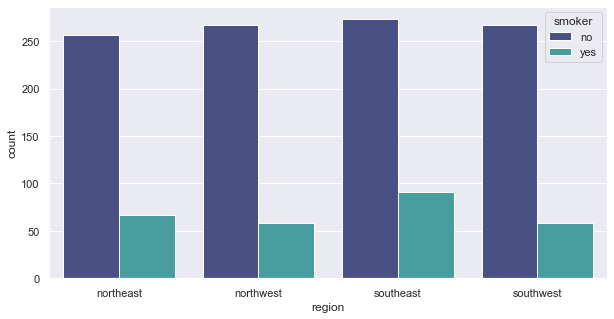

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(df.region, hue=df.smoker, palette="mako");

**Observations**
- More people smoke in the southeast region the any other region.

### <span style="color:blue">Grouping data with respect to smoker and non-smokers</span>

In [39]:
df[df.smoker=="yes"].describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,274.000000,274,274.000000,274.000000,274,274,274.000000
unique,NaN,2,NaN,NaN,1,4,NaN
top,NaN,male,NaN,NaN,yes,southeast,NaN
freq,NaN,159,NaN,NaN,274,91,NaN
mean,38.514599,NaN,30.708449,1.113139,NaN,NaN,32050.231832
std,13.923186,NaN,6.318644,1.157066,NaN,NaN,11541.547176
min,18.000000,NaN,17.195000,0.000000,NaN,NaN,12829.455100
25%,27.000000,NaN,26.083750,0.000000,NaN,NaN,20826.244213
50%,38.000000,NaN,30.447500,1.000000,NaN,NaN,34456.348450
75%,49.000000,NaN,35.200000,2.000000,NaN,NaN,41019.207275


**Observations**
- The mean age of smokers is 38.5.
- More men smoke than women from the dataframe above. 
- The mean bmi of smokers is 30.7 with a min bmi of 17 and a max bmi of 52.8.
- The mean number of children of those who smoke is 1.
- The region with the most smokers is the southeast region with a count of 91.
- The mean medical charges of smokers is 32,050. The min value is 12,829 and a max value of 63,770.

In [40]:
df[df.smoker=="no"].describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1064.000000,1064,1064.000000,1064.000000,1064,1064,1064.000000
unique,NaN,2,NaN,NaN,1,4,NaN
top,NaN,female,NaN,NaN,no,southeast,NaN
freq,NaN,547,NaN,NaN,1064,273,NaN
mean,39.385338,NaN,30.651795,1.090226,NaN,NaN,8434.268298
std,14.083410,NaN,6.043111,1.218136,NaN,NaN,5993.781819
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.750000,NaN,26.315000,0.000000,NaN,NaN,3986.438700
50%,40.000000,NaN,30.352500,1.000000,NaN,NaN,7345.405300
75%,52.000000,NaN,34.430000,2.000000,NaN,NaN,11362.887050


**Observations**
- The mean age of non-smokers is 39.38.
- More women are non-smokers from the dataset. 
- The mean bmi of non-smokers is 30.65 with a min bmi of 16 and a max bmi of 53 (distribution similar to smokers).
- The mean number of children of those who don't smoke is 1.
- The region with the most non-smokers is the southeast region with a count of 273.
- The mean medical charges of smokers is 8,434. The min value is 5,993 and a max value of 36,910.

### <span style="color:blue">Sex vs BMI</span>

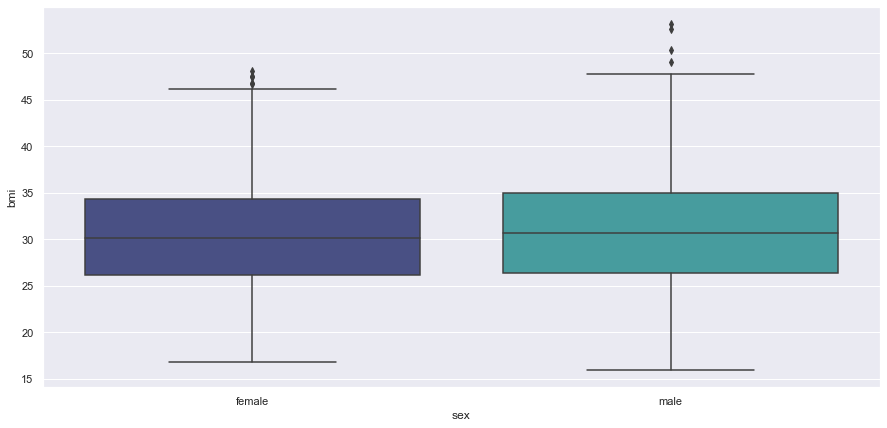

In [41]:
plt.figure(figsize=(15,7))
sns.boxplot(df.sex, df.bmi, palette="mako");

### <span style="color:blue">Sex vs BMI vs Region</span>

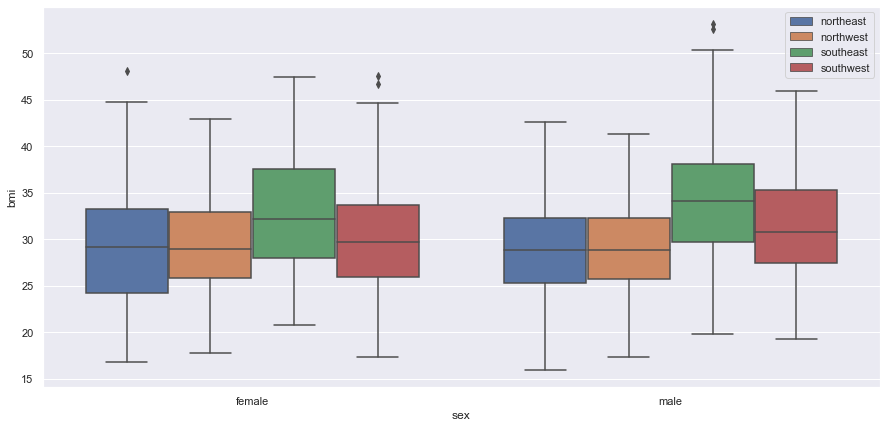

In [42]:
plt.figure(figsize=(15,7))
sns.boxplot(df.sex, df.bmi, hue=df.region)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### <span style="color:blue">Sex vs Charges</span>

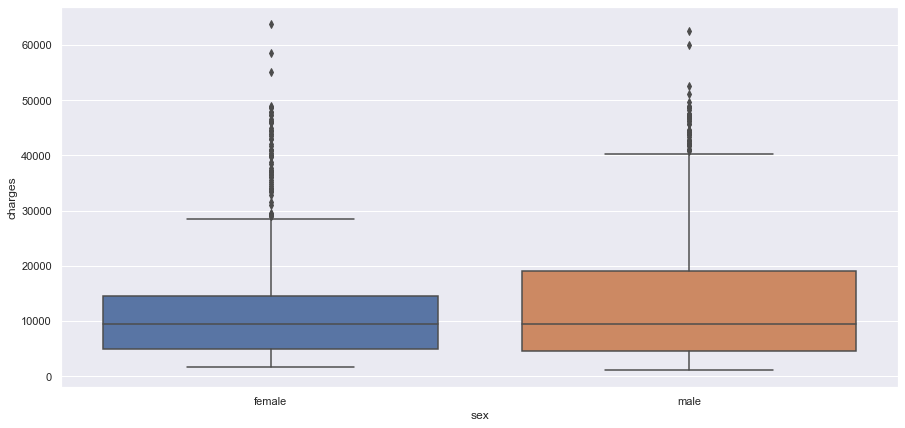

In [43]:
plt.figure(figsize=(15,7))
sns.boxplot(df.sex, df.charges);

### <span style="color:blue">Sex vs Charges vs Region</span>

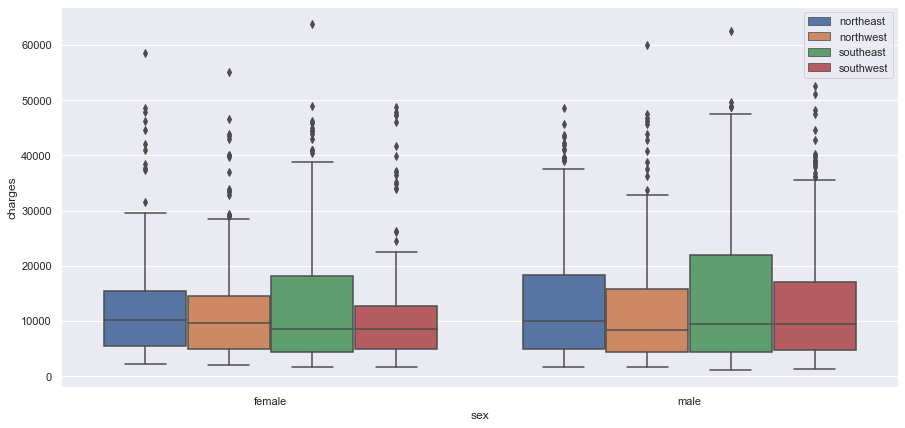

In [44]:
plt.figure(figsize=(15,7))
sns.boxplot(df.sex, df.charges, hue=df.region)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### <span style="color:blue">Age vs BMI vs Smoker</span>

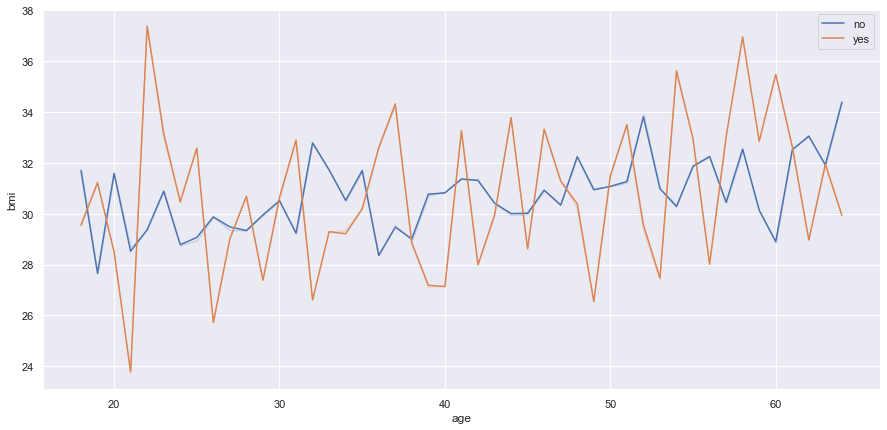

In [45]:
plt.figure(figsize=(15,7))
sns.lineplot(df.age, df.bmi, hue=df.smoker, ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### <span style="color:blue">Age vs Charges vs Smoker</span>

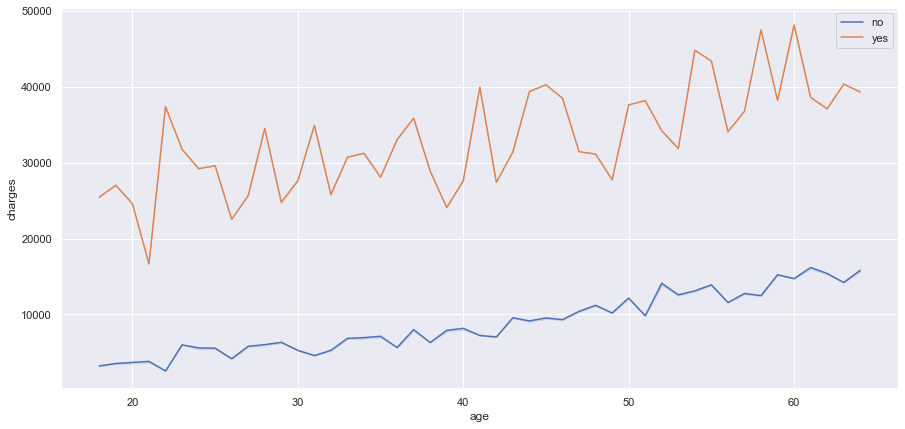

In [46]:
plt.figure(figsize=(15,7))
sns.lineplot(df.age, df.charges, hue=df.smoker, ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### <span style="color:blue">Age vs Children vs Smoker</span>

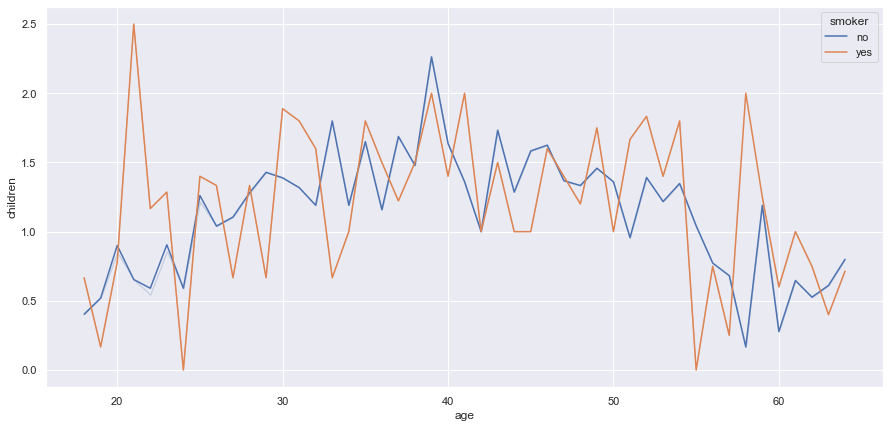

In [47]:
plt.figure(figsize=(15,7))
sns.lineplot(df.age, df.children, hue=df.smoker, ci=0)
plt.show()

## <span style="color:blue">Hypothesis Testing</span>

### <span style="color:blue">Medical claims</span>
- We want prove that the medical claims made by the people who smoke is greater than those who don't? 
- level of significance (Alpha ) = 0.05.

We will use a two sample t-test of the sample means:
- $H_o$ = $\mu_{smokers} - \mu_{non-smokers} = 0$   (Smokers don't have higher charges than non-smokers)
- $H_a$ = $\mu_{non-smokers} < \mu_{smokers}$ = $\mu_{non-smokers} - \mu_{smokers} < 0$ (Smokers have a higher charges than non-smokers)

Slice up dataframe to get charges of smokers and non-smokers.

In [48]:
# smoker charges 
smoker_charges = df[df.smoker=="yes"].charges
print(smoker_charges.head(), "\n")

# non-smoker charges
non_smoker_charges = df[df.smoker=="no"].charges
print(non_smoker_charges.head(), "\n")

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64 

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64 



In [49]:
# NOTE: the p-value given is two-sided so the one-sided p value would be p/2
t, p_twotailed = stats.ttest_ind(smoker_charges, non_smoker_charges)
print("tstats = ",t, ", p_twotailed = ", p_twotailed, ", p_onetailed =", p_twotailed/2)

if p_twotailed < 0.05:
    print(f'With a p-value of {round(p_twotailed,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(p_twotailed,4)} the difference is not significant. aka |We fail to reject the null|')

tstats =  46.664921172723716 , p_twotailed =  8.271435842177219e-283 , p_onetailed = 4.1357179210886093e-283
With a p-value of 0.0 the difference is significant. aka |We reject the null|


### <span style="color:blue">Sex BMI</span>
- Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
- level of significance (Alpha ) = 0.05.

We will use a two sample t-test of the sample means:
- $H_o$ = $\mu_{male} = \mu_{female}$  (BMI isn't significantly different between sex.)
- $H_a$ = $\mu_{male} \neq \mu_{female}$ (BMI is significantly different between sex.)

In [50]:
female_bmi = df[df.sex=="female"].bmi
male_bmi = df[df.sex=="male"].bmi

In [51]:
# NOTE: the p-value given is two-sided so the one-sided p value would be p/2
t, p_value = stats.ttest_ind(female_bmi, male_bmi)
print("tstats = ",t, ", p_twotailed = ", p_value, ", p_onetailed =", p_value/2)

if p_value < 0.05:
    print(f'With a p-value of {round(p_value,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(p_value,4)} the difference is not significant. aka |We fail to reject the null|')

tstats =  -1.696752635752224 , p_twotailed =  0.08997637178984932 , p_onetailed = 0.04498818589492466
With a p-value of 0.09 the difference is not significant. aka |We fail to reject the null|


### <span style="color:blue">Proportion of smokers across regions</span>
- Prove or disapprove that the proportion of smokers are equal across different regions
- Level of significance (Alpha) = 0.05.

We will form a hypothesis to test the proportions across all regions:

- $H_0$ : The proportions are equal.
- $H_a$ : The proportions are not equal

In [52]:
df_crosstab = pd.crosstab(df.region, df.smoker)
df_crosstab

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [54]:
chi2, p_value, dof, expected = stats.chi2_contingency(df_crosstab)
print(f"Chi2 value = {chi2}")
print(f"p-value = {p_value}")
print(f"Degrees of freedom = {dof}")

Chi2 value = 7.343477761407071
p-value = 0.06171954839170541
Degrees of freedom = 3


In [55]:
print(f"At 5 %s level of significance, the p-value is {round(p_value, 10)}")

if p_value < 0.05:
    print(f'With a p-value of {round(p_value,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(p_value,4)} the difference is not significant. aka |We fail to reject the null|')

At 5 %s level of significance, the p-value is 0.0617195484
With a p-value of 0.0617 the difference is not significant. aka |We fail to reject the null|


### <span style="color:blue">Mean BMI of women with no children, one child and two children</span>
- Prove and disprove that the mean BMI of women with no children, one child and two children the same.
- Level of significance (Alpha) = 0.05.

We will form a hypothesis to test the mean of bmi amongst women with 0, 1, and 2 children:

- $H_o : \mu_{0} = \mu_{1} = \mu_{2}$
- $H_a$ : At least one $\mu$ differs

In [56]:
child_0 = df[(df.sex=="female") & (df.children==0)].bmi
child_1 = df[(df.sex=="female") & (df.children==1)].bmi
child_2 = df[(df.sex=="female") & (df.children==2)].bmi
print(f"Count, Mean and standard deviation of mean pressue exerted by compact car: {len(child_0)}, {child_0.mean()}, {np.std(child_0,ddof=1)}")
print(f"Count, Mean and standard deviation of mean pressue exerted by compact car: {len(child_1)}, {child_1.mean()}, {np.std(child_1,ddof=1)}")
print(f"Count, Mean and standard deviation of mean pressue exerted by compact car: {len(child_2)}, {child_2.mean()}, {np.std(child_2,ddof=1)}")

Count, Mean and standard deviation of mean pressue exerted by compact car: 289, 30.361522491349486, 5.966934229366254
Count, Mean and standard deviation of mean pressue exerted by compact car: 158, 30.05265822784811, 5.786831048981313
Count, Mean and standard deviation of mean pressue exerted by compact car: 119, 30.64978991596637, 6.628199943377461


In [57]:
mean_bmi_df = pd.DataFrame() # init dataframe to append later
df1 = pd.DataFrame({'children': 0, 'mean_bmi': child_0})
df2 = pd.DataFrame({'children': 1, 'mean_bmi': child_1})
df3 = pd.DataFrame({'children': 2, 'mean_bmi': child_2})

In [58]:
mean_bmi_df = mean_bmi_df.append(df1)
mean_bmi_df = mean_bmi_df.append(df2)
mean_bmi_df = mean_bmi_df.append(df3)
mean_bmi_df

,children,mean_bmi
0,0,27.900
5,0,25.740
9,0,25.840
11,0,26.290
13,0,39.820
...,...,...
1313,2,34.700
1319,2,26.315
1323,2,40.370
1328,2,24.225


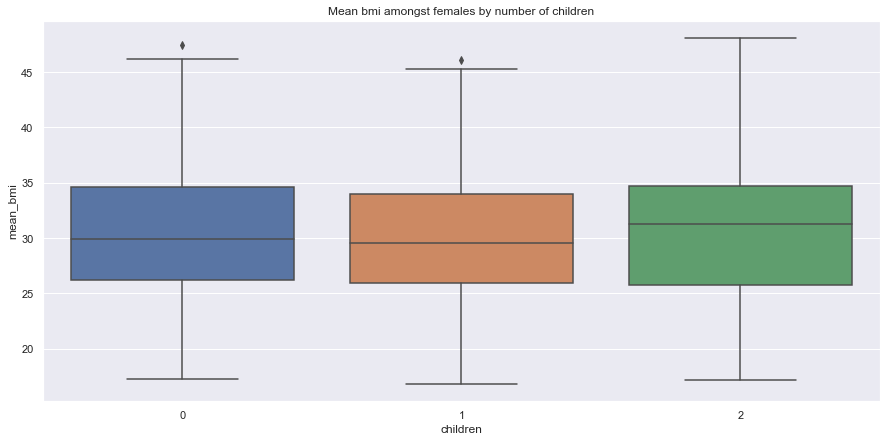

In [59]:
plt.figure(figsize=(15,7))
sns.boxplot(x="children", y="mean_bmi", data = mean_bmi_df)
plt.title('Mean bmi amongst females by number of children')
plt.show()

In [60]:
mod = ols('mean_bmi ~ children', data = mean_bmi_df).fit()
aov_table = anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


In [61]:
p_value = aov_table.iloc[0][3]

if p_value < 0.05:
    print(f'With a p-value of {round(p_value,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(p_value,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.7938 the difference is not significant. aka |We fail to reject the null|


## <span style="color:blue">Conclusions</span>
- Smokers have more medical charges than non-smokers do.
- As customer age increases so do the medical charges.

- **Medical Claims**
    - We rejected the null hypothesis that medical claims of smokers are no different than claims from non-smokers.
    
- **BMI between sex**
    - We failed to reject the null hypothesis that the bmi between female and male are significantly different.

- **Proportions across regions**
    - We failed to rejec the null hypothesis that the proportions of smokers across regions is significantly different.
    
- **Mean BMI of women versus children**
    - We failed to reject the null hypothesis that the bmi amongst women with 0, 1 and 2 children is significantly different.